# Carbon-monooxide content in the air

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for beatiful visualization

In [3]:
# reading csv
CO= pd.read_csv(r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\smoke-air quality\\CO(NSW).csv')
#CO

In [4]:
from datetime import datetime, date
CO["Date"]= pd.to_datetime(CO["Date"]).dt.normalize() #conversion of object type to date type
#CO["Date"]

In [5]:
# Taking average of air quality index for all regions in NSW 
CO['CO_avg'] = CO.iloc[:,1:].mean(axis=1)
#CO.head()

In [7]:
# set Date to datetimeindex
CO.set_index('Date', inplace=True)
CO.index = pd.to_datetime(CO.index)

In [8]:
CO_avg = CO.resample('M').agg({'CO_avg':'max'}) 
CO_avg.head()

,CO_avg
Date,
2017-11-30,0.160000
2017-12-31,0.210000
2018-01-31,0.177778
2018-02-28,0.170000
2018-03-31,0.180000


In [9]:
# Naming the index column
CO_avg.index.name= "Date"

# Converting the index into a column
CO_MONTHLY= CO_avg.reset_index()
print("modified: ")
print(CO_MONTHLY)

modified: 
         Date    CO_avg
0  2017-11-30  0.160000
1  2017-12-31  0.210000
2  2018-01-31  0.177778
3  2018-02-28  0.170000
4  2018-03-31  0.180000
5  2018-04-30  0.210000
6  2018-05-31  0.250000
7  2018-06-30  0.230000
8  2018-07-31  0.250000
9  2018-08-31  0.172727
10 2018-09-30  0.172727
11 2018-10-31  0.181818
12 2018-11-30  0.166667
13 2018-12-31  0.172727
14 2019-01-31  0.181818
15 2019-02-28  0.154545
16 2019-03-31  0.163636
17 2019-04-30  0.180000
18 2019-05-31  0.227273
19 2019-06-30  0.236364
20 2019-07-31  0.227273
21 2019-08-31  0.181818
22 2019-09-30  0.154545
23 2019-10-31  0.181818
24 2019-11-30  0.209091
25 2019-12-31  0.300000


In [10]:
CO_MONTHLY['mnth_yr'] = CO_MONTHLY['Date'].apply(lambda x: x.strftime('%B-%Y')) 
CO_MONTHLY['year'] = CO_MONTHLY['Date'].apply(lambda x: x.strftime('%Y')) 
print(CO_MONTHLY)

         Date    CO_avg         mnth_yr  year
0  2017-11-30  0.160000   November-2017  2017
1  2017-12-31  0.210000   December-2017  2017
2  2018-01-31  0.177778    January-2018  2018
3  2018-02-28  0.170000   February-2018  2018
4  2018-03-31  0.180000      March-2018  2018
5  2018-04-30  0.210000      April-2018  2018
6  2018-05-31  0.250000        May-2018  2018
7  2018-06-30  0.230000       June-2018  2018
8  2018-07-31  0.250000       July-2018  2018
9  2018-08-31  0.172727     August-2018  2018
10 2018-09-30  0.172727  September-2018  2018
11 2018-10-31  0.181818    October-2018  2018
12 2018-11-30  0.166667   November-2018  2018
13 2018-12-31  0.172727   December-2018  2018
14 2019-01-31  0.181818    January-2019  2019
15 2019-02-28  0.154545   February-2019  2019
16 2019-03-31  0.163636      March-2019  2019
17 2019-04-30  0.180000      April-2019  2019
18 2019-05-31  0.227273        May-2019  2019
19 2019-06-30  0.236364       June-2019  2019
20 2019-07-31  0.227273       July

In [40]:
# Save the year+months ozone data into a csv
CO_MONTHLY.to_csv("CO_MONTHLY.csv")

# PLOT CO 

In [11]:
from matplotlib import pyplot
#plt.style.use('ggplot')
plt.style.use('seaborn-white')

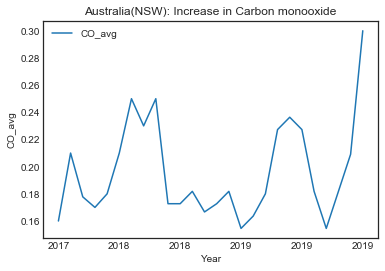

In [12]:
CO_MONTHLY.plot(x= "year", y="CO_avg")

fig= plt.gcf()
#fig.savefig("ozone_monthly.png")
pyplot.xlabel("Year")
pyplot.ylabel('CO_avg')
pyplot.title("Australia(NSW): Increase in Carbon monooxide")
fig.savefig("CO_monthly.png")
pyplot.show()


#plt.savefig('Aus_Diff_in_temp.png')

# yearly data

In [44]:
CO_yearly = CO.resample('Y').agg({'CO_avg':'max'})
CO_yearly.head()

,CO_avg
Date,
2017-12-31,0.21
2018-12-31,0.25
2019-12-31,0.30


In [45]:
# Naming the index column
CO_yearly.index.name= "Date"

# Converting the index into a column
CO_yearly= CO_yearly.reset_index()
print("modified: ")
print(CO_yearly)

modified: 
        Date  CO_avg
0 2017-12-31    0.21
1 2018-12-31    0.25
2 2019-12-31    0.30


In [46]:
# ADD year colum to it
CO_yearly['year'] = CO_yearly['Date'].apply(lambda x: x.strftime('%Y'))
print(CO_yearly)

        Date  CO_avg  year
0 2017-12-31    0.21  2017
1 2018-12-31    0.25  2018
2 2019-12-31    0.30  2019


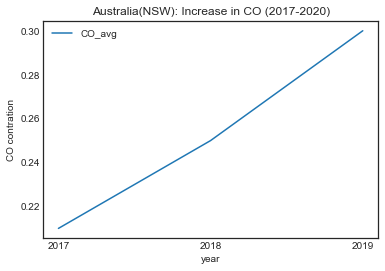

In [47]:
CO_yearly.plot(x= "year", y="CO_avg")

fig= plt.gcf()
#fig.savefig("ozone_yearly.png")
#pyplot.xlabel("Year")
pyplot.ylabel('CO contration')
pyplot.title("Australia(NSW): Increase in CO (2017-2020)")
fig.savefig("CO.png")
pyplot.show()


In [48]:
# Save the year+months ozone data into a csv
CO_yearly.to_csv("CO_2017-2019.csv")